In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fifa19/data.csv


In [2]:
fifa = pd.read_csv('../input/fifa19/data.csv')
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Plotting Histogram for overall rating

<function matplotlib.pyplot.show(*args, **kw)>

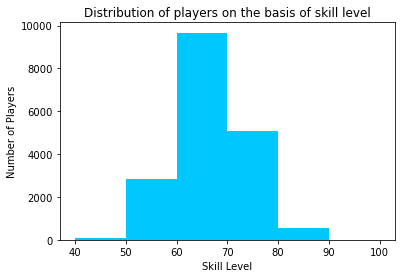

In [3]:
import matplotlib.pyplot as plt

bins = [40,50,60,70,80,90,100]
plt.hist(fifa.Overall, bins = bins, color = '#00c8ff')
plt.xticks(bins)
plt.ylabel('Number of Players')
plt.xlabel('Skill Level')
plt.title('Distribution of players on the basis of skill level')


plt.show

**PIE CHART**

In [4]:
fifa['Preferred Foot']

0         Left
1        Right
2        Right
3        Right
4        Right
         ...  
18202    Right
18203    Right
18204    Right
18205    Right
18206    Right
Name: Preferred Foot, Length: 18207, dtype: object

<function matplotlib.pyplot.show(*args, **kw)>

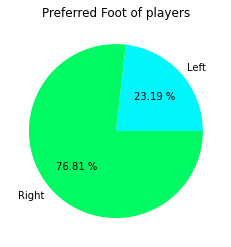

In [5]:
left = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
right = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]
labels = ['Left', 'Right']
colors = ['#00f6fa','#00fa64']
plt.pie([left, right], labels = labels, colors = colors, autopct = '%.2f %%')
plt.title('Preferred Foot of players')
plt.show



In [6]:
fifa['Weight']

0        159lbs
1        183lbs
2        150lbs
3        168lbs
4        154lbs
          ...  
18202    134lbs
18203    170lbs
18204    148lbs
18205    154lbs
18206    176lbs
Name: Weight, Length: 18207, dtype: object

<function matplotlib.pyplot.show(*args, **kw)>

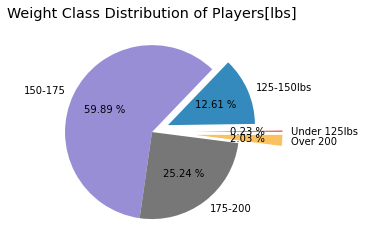

In [7]:
fifa.Weight = [int(x.strip('lbs')) if type(x) == str else x for x in fifa.Weight]

plt.style.use('ggplot')

light = fifa.loc[fifa.Weight < 125].count()[0]
light_medium = fifa.loc[(fifa.Weight < 150) & (fifa.Weight >=125)].count()[0]
medium = fifa.loc[(fifa.Weight >= 150) & (fifa.Weight < 175)].count()[0]
medium_heavy = fifa.loc[(fifa.Weight >= 175) & (fifa.Weight < 200)].count()[0]
heavy = fifa.loc[fifa.Weight >= 200].count()[0]

labels = ['Under 125lbs', '125-150lbs', '150-175', '175-200', 'Over 200']
explode = [.5, .2, 0, 0, .5]

plt.pie([light, light_medium, medium, medium_heavy, heavy], labels = labels, autopct = '%.2f %%', pctdistance = 0.6, explode = explode)
plt.title('Weight Class Distribution of Players[lbs]')
plt.show

**Using Box Plot distribution to compare overall strength between Teams**

<function matplotlib.pyplot.show(*args, **kw)>

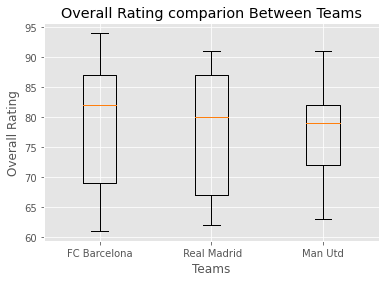

In [8]:
Barcelona = fifa.loc[fifa.Club == 'FC Barcelona']['Overall']
Madrid = fifa.loc[fifa.Club == 'Real Madrid']['Overall']
Man_Utd = fifa.loc[fifa.Club == 'Manchester United']['Overall']
labels = ['FC Barcelona', ' Real Madrid', 'Man Utd']

plt.boxplot([Barcelona, Madrid, Man_Utd], labels = labels)
plt.title('Overall Rating comparion Between Teams')
plt.xlabel('Teams')
plt.ylabel('Overall Rating')
plt.style.use('default')
plt.show